# Proceso de Tokenizacion

## Descripción General
Este notebook explora el uso del tokenizador y el modelo preentrenado BERT (bert-base-uncased) para realizar tareas de tokenización, comparación de similitud semántica entre palabras y visualización de relaciones mediante mapas de calor.

## Librerías Utilizadas
- transformers: Para cargar el tokenizador y el modelo BERT.

- torch: Para operaciones con tensores.

- seaborn y matplotlib: Para visualización de datos.

- pandas y numpy: Para manipulación de datos y estructuras.

In [ ]:
!pip install transformers torch seaborn matplotlib pandas numpy

## 1. Importación de Librerías

In [3]:
from transformers import BertTokenizer
import torch
from transformers import BertModel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

D:\profile\programing\ia\BasicLLMsModels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Carga del Tokenizador y Modelo BERT
- Se carga el tokenizador bert-base-uncased.

- Se tokeniza la frase: "Hola cómo estás?".

In [4]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("Hola cómo estás?")

In [ ]:
tokens

In [5]:
model = BertModel.from_pretrained("bert-base-uncased")

## 3. Definición de la Clase Token
La clase Token permite:

- Convertir una palabra en un token y obtener su embedding.

- Calcular la similitud coseno entre dos tokens.

- Mostrar similitudes en porcentaje o valor numérico.

In [6]:
class Token:
  def __init__(self, label: str):
    self.label: str = label
    self.id: int = tokenizer.convert_tokens_to_ids([self.label])[0]
    self.embedding = model.embeddings.word_embeddings(torch.tensor([self.id]))

  def get_similarity_per(self, tensor: torch.Tensor, toLabel: str) -> str:
    value = tensor.item()
    return f"The {self.label} and {toLabel} have a {round(value * 100, 2)}% similarity";


  def compare(self, to: "Token") -> str:
    similarity_tensor = torch.nn.functional.cosine_similarity(self.embedding, to.embedding, dim=1)
    return self.get_similarity_per(similarity_tensor[0], to.label)

  def compare_get(self, to: "Token") -> str:
    similarity_tensor = torch.nn.functional.cosine_similarity(self.embedding, to.embedding, dim=1)
    return round(similarity_tensor[0].item(), 2)

## 4. Creación de Tokens de Ejemplo
Se crean instancias de la clase `Token` para palabras como:

- `king`, `man`, `woman`, `queen`, `teacher`, `soldier`

- `cat`, `lion`, `tiger`, `dog`, `gray_wolf`, `coyote`

In [ ]:
king = Token("king")
man = Token("man")
woman = Token("woman")
queen = Token("queen")
teacher = Token("teacher")
soldier = Token("soldier")

cat = Token("cat")
lion = Token("lion")
tiger = Token("tiger")
dog = Token("dog")
gray_wolf = Token("Gray wolf")
coyote = Token("coyote")

In [ ]:
king.embedding

## 5. Comparación de Similitudes
- Se comparan pares de palabras usando similitud coseno.

- Se prueba la analogía clásica: `king - man + woman ≈ queen`

In [ ]:
print(queen.compare(man))
print(king.compare(queen))
similarity = torch.nn.functional.cosine_similarity(king.embedding-man.embedding+woman.embedding, queen.embedding)
print(similarity[0])

In [ ]:
canidae_list = [dog, gray_wolf, coyote]
felidae_list = [cat, lion, tiger]
for i in range(len(canidae_list)):
  for j in range(len(felidae_list)):
    print(canidae_list[i].compare(felidae_list[j]), end="\n\n")

print(cat.compare(tiger))
print(cat.compare(lion))

## 6. Visualización con Heatmaps
- Se generan dos mapas de calor:

### 1. Animales vs Humanos: Muestra similitudes entre tokens de animales y humanos.

In [ ]:
animal_tokens  = [cat, lion, tiger, dog, gray_wolf, coyote]
human_tokens = [queen, king, man, woman, teacher, soldier]

data = []
for a in animal_tokens:
    row = []
    for h in human_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[animal.label for animal in animal_tokens],
                  index=[human.label for human in human_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()


### 2. Humanos vs Humanos: Muestra similitudes entre tokens de humanos.

In [ ]:
data = []
for a in human_tokens:
    row = []
    for h in human_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[human.label for human in human_tokens],
                  index=[human.label for human in human_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()


### 2. Animales vs Animales: Muestra similitudes entre tokens de animales.

In [ ]:
data = []
for a in animal_tokens:
    row = []
    for h in animal_tokens:
        sim = a.compare_get(h)
        row.append(sim)
    data.append(row)
df = pd.DataFrame(data,
                  columns=[animal.label for animal in animal_tokens],
                  index=[animal.label for animal in animal_tokens])

plt.figure(figsize=(8,8))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

# 4️⃣ Mostrar
plt.title("heatmap animals vs humans", fontsize=14)
plt.show()


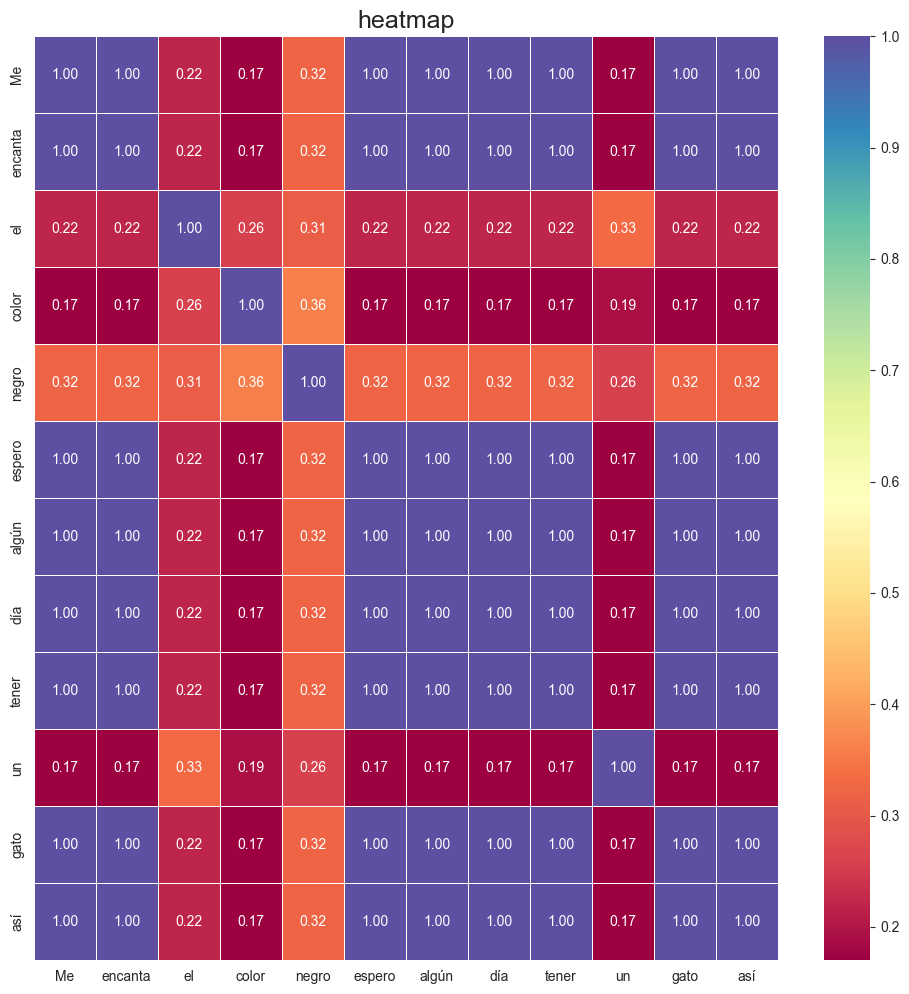

In [13]:
text_list = "Me encanta el color negro espero algún día tener un gato así".split(" ")

text_token = [Token(x) for x in text_list]

data = []
for text1 in text_token:
    row = []
    for text2 in text_token:
        sim = text1.compare_get(text2)
        row.append(sim)
    data.append(row)


df = pd.DataFrame(data,
                  columns=[token.label for token in text_token],
                  index=[token.label for token in text_token])

plt.figure(figsize=(len(text_list),len(text_list)))
sns.heatmap(df,
            annot=True,        # Mostrar valores
            fmt=".2f",         # Formato de los números
            cmap="Spectral",     # Paleta de colores
            linewidths=0.5,
            robust=True)    # Líneas divisorias

plt.title("heatmap", fontsize=18)
plt.show()

